ITERATION 1:

Centroid:
 [[ 8  4]
 [24  4]]

Distances from Centroids:
Data Point  Centroid 1  Centroid 2  Cluster
    [8, 4]    0.000000   16.000000        1
   [24, 4]   16.000000    0.000000        2
   [15, 8]    8.062258    9.848858        1
    [4, 4]    4.000000   20.000000        1
  [24, 12]   17.888544    8.000000        2


Cluster Points:
Cluster 1:
[[8, 4], [15, 8], [4, 4]]
Cluster 2:
[[24, 4], [24, 12]]


ITERATION 2:

Centroid:
 [[ 9.          5.33333333]
 [24.          8.        ]]

Distances from Centroids:
Data Point  Centroid 1  Centroid 2  Cluster
    [8, 4]    1.666667   16.492423        1
   [24, 4]   15.059143    4.000000        2
   [15, 8]    6.565905    9.000000        1
    [4, 4]    5.174725   20.396078        1
  [24, 12]   16.414763    4.000000        2




Final Clusters:
 X  Y  Cluster
 8  4        1
24  4        2
15  8        1
 4  4        1
24 12        2


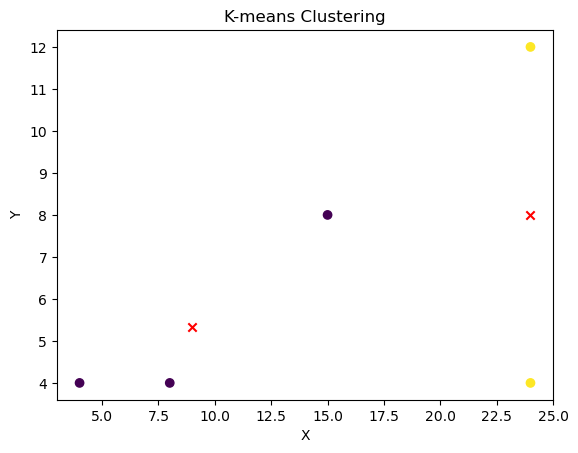

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def k_means(data, k, max_iterations=100):
    centroids = data[:k]
    centroid_history = []
    distance_history = []
    cluster_history = []

    for _ in range(max_iterations):
        distances = np.array([euclidean_distance(data_point, centroid) for data_point in data for centroid in centroids])
        distances = distances.reshape(len(data), k)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        if np.all(centroids == new_centroids):
            break

        centroid_history.append(centroids)
        distance_history.append(distances)
        centroids = new_centroids

        # Save clustering points in this iteration
        cluster_points = [data[labels == i] for i in range(k)]
        cluster_history.append(cluster_points)

    centroid_history.append(centroids)
    distance_history.append(distances)

    return labels, centroid_history, distance_history, cluster_history

# Example usage
X = [8, 24, 15, 4, 24]
Y = [4, 4, 8, 4, 12]
data = np.column_stack((X, Y))

k = 2
labels, centroid_history, distance_history, cluster_history = k_means(data, k)

# Print centroids and distances from centroids for each iteration
for i, centroid in enumerate(centroid_history):
    print(f"ITERATION {i + 1}:")
    print(f"\nCentroid:\n {centroid}")
    print("\nDistances from Centroids:")
    cluster_labels = labels + 1  # Adjust index to start from 1 instead of 0
    df = pd.DataFrame(distance_history[i], columns=[f"Centroid {j+1}" for j in range(k)])
    df.insert(0, "Data Point", data.tolist())
    df["Cluster"] = cluster_labels
    print(df.to_string(index=False))
    print("\n")

    # Print points in each cluster for this iteration
    if i < len(cluster_history):
        print("Cluster Points:")
        for j, cluster_points in enumerate(cluster_history[i]):
            print(f"Cluster {j + 1}:")
            print(cluster_points.tolist())
    print("\n")        

# Print final clusters
print("Final Clusters:")
df = pd.DataFrame(data, columns=["X", "Y"])
df["Cluster"] = labels + 1  # Adjust index to start from 1 instead of 0
print(df.to_string(index=False, header=True))

# Plot clusters
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.scatter(centroid_history[-1][:, 0], centroid_history[-1][:, 1], marker='x', c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-means Clustering')
plt.show()
